In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import pickle

In [3]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='survived', ylabel='Proportion'>

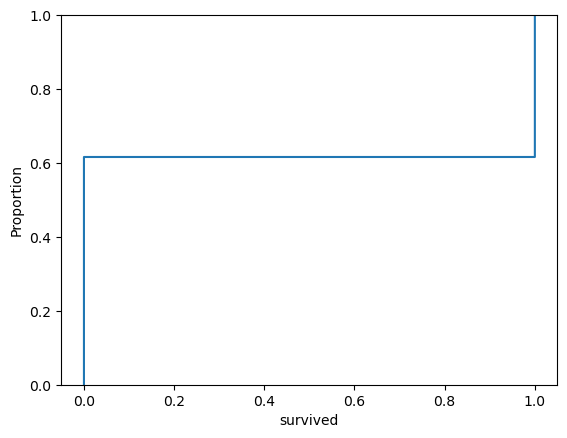

In [4]:
sns.ecdfplot(df["survived"])

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df=df.drop(["alone", "alive", "embark_town", "who", "class", "adult_male", "embarked", "deck"], axis=1)
def gender(s):
    if s == "male":
        return 1 
    else:
        return 2
df["sex"] = df["sex"].map(gender)

In [8]:
df

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,2,38.0,1,0,71.2833
2,1,3,2,26.0,0,0,7.9250
3,1,1,2,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,2,19.0,0,0,30.0000
888,0,3,2,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [9]:
df = df.fillna(df.age.median())
X = df.iloc[:, 1:]
y = df["survived"]

In [10]:
df.corr()

,survived,pclass,sex,age,sibsp,parch,fare
survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500
sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333
age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688
sibsp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651
parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000


In [11]:
X_train , X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.8 , random_state= 42)
model = LogisticRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
accuracy_score(Y_test, pred)

0.8036465638148668

In [12]:
with open('log_reg.pkl', 'wb') as f:
    pickle.dump(model, f)

In [13]:
model.predict(np.array([[1,  1, 20,  1,  0, 50]]))

/home/mobcoder/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])